In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df1 = pd.read_csv('datasets/반도체(831)_수출입통계(2011~2021).csv', encoding='utf-8')
df1.head()

,시점,수출 금액,수출 증감률,수입 금액,수입 증감률
0,2011.01,20373544,5.1,8445306,0.9
1,2011.02,16665092,-18.2,6262048,-25.9
2,2011.03,22197493,33.2,8478018,35.4
3,2011.04,19750481,-11.0,7857524,-7.3
4,2011.05,18849229,-4.6,7487074,-4.7


In [29]:
# 한글 깨짐

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [30]:
df1 = df1[['시점', '수출 금액', '수입 금액']]
df1.reset_index(drop=True, inplace=True)
df1 = df1.rename(columns={'년월':'시점', '수출 금액':'수출액', '수입 금액':'수입액'})
df1

,시점,수출액,수입액
0,2011.01,20373544,8445306
1,2011.02,16665092,6262048
2,2011.03,22197493,8478018
3,2011.04,19750481,7857524
4,2011.05,18849229,7487074
...,...,...,...
127,2021.08,15057897,4499001
128,2021.09,15752184,4364291
129,2021.10,17222409,4201917
130,2021.11,16940429,4587520


In [31]:
dates = pd.date_range('2011-1-1', '2021-12-31', freq='M')
dates

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=132, freq='M')

In [32]:
df1['시점'] = dates
df1

,시점,수출액,수입액
0,2011-01-31,20373544,8445306
1,2011-02-28,16665092,6262048
2,2011-03-31,22197493,8478018
3,2011-04-30,19750481,7857524
4,2011-05-31,18849229,7487074
...,...,...,...
127,2021-08-31,15057897,4499001
128,2021-09-30,15752184,4364291
129,2021-10-31,17222409,4201917
130,2021-11-30,16940429,4587520


In [33]:
df1.describe()

,수출액,수입액
count,1.320000e+02,1.320000e+02
mean,1.644245e+07,4.843965e+06
std,2.242078e+06,1.317828e+06
min,1.020776e+07,2.707382e+06
25%,1.496515e+07,3.795420e+06
50%,1.635859e+07,4.484471e+06
75%,1.787363e+07,5.715751e+06
max,2.224795e+07,8.478018e+06


**ARIMA (Auto Regressive Integrated Moving Average Model)**

In [34]:
# 수입액 데이터프레임
income = df1[['시점', '수입액']]
# income_series = income['수입액']
income_df = income.set_index('시점')
income_df

,수입액
시점,
2011-01-31,8445306
2011-02-28,6262048
2011-03-31,8478018
2011-04-30,7857524
2011-05-31,7487074
...,...
2021-08-31,4499001
2021-09-30,4364291
2021-10-31,4201917


## ADF를 이용한 정상성 확인
* ARIMA 모델을 적용하기 전, 우선 시계열 데이터를 정상성 데이터를 바꾼 후 사용하는 것이 바람직함
* 정상성을 띄기 위해선 시계열 데이터의 평균, 분산이 시간에 따라 일정해야함
* lag에 따른 공분산이 일정해야함
* => 이를 위해 로그 변환을 해주거나 n차분을 적용함
* python에서는 ADF test를 statsmodels 라이브러리에서 adfuller를 이용하면 쉽게 구현 가능



* autolag='AIC' 또는 'BIC' : 'AIC' 또는 'BIC'가 가장 낮게 나오는 p를 자동으로 설정함. autolag를 지정할 경우 maxlag에서 지정한 값이 무시됨(maxlag의 디폴트값은 $12*(nobs/100)^1/4)$


## 시계열분석 (수입)

Text(0.5, 1.0, '반도체 수입액 시계열 시각화')

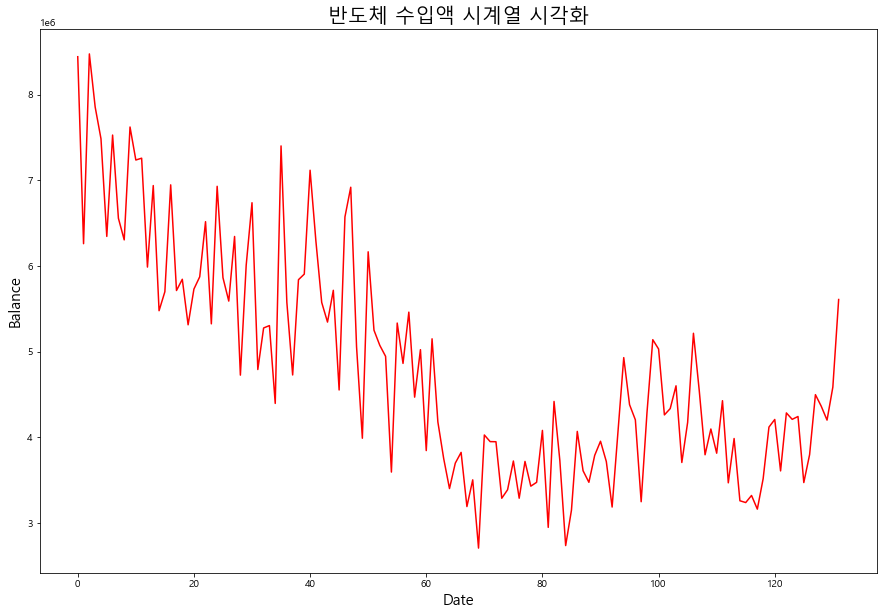

In [35]:
income_amount = df1["수입액"]

# 그려보기
plt.figure(figsize=(15,10))
plt.plot(income_amount, color='red')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Balance', fontsize=15)
plt.title('반도체 수입액 시계열 시각화', fontsize=20)

In [36]:
from statsmodels.tsa.stattools import adfuller

# print(income_df.shift(1))

""" 차분 방법 """
income_df_diff = income_df - income_df.shift(1)
print(income_df_diff)

y = income_df.dropna()
y1diff = income_df_diff.dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

                  수입액
시점                   
2011-01-31        NaN
2011-02-28 -2183258.0
2011-03-31  2215970.0
2011-04-30  -620494.0
2011-05-31  -370450.0
...               ...
2021-08-31   699784.0
2021-09-30  -134710.0
2021-10-31  -162374.0
2021-11-30   385603.0
2021-12-31  1022516.0

[132 rows x 1 columns]
원 데이터 ADF Statistic: -2.353
원 데이터 p-value: 0.155
1차 차분 ADF Statistic: -3.849
1차 차분 p-value: 0.002


In [38]:
from pmdarima.arima import auto_arima

model_arima= auto_arima(y,trace=True, error_action='ignore', d=1, start_p=0,start_q=0,max_p=3,max_q=3,suppress_warnings=True,stepwise=False,seasonal=False)
# y1diff
model_arima.fit(y)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3971.739, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3933.283, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3943.521, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3941.006, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3938.308, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3935.782, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3939.213, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3937.393, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3937.749, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3936.603, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3938.574, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3938.034, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3943.127, Time=0.37 sec

Best model:  ARIMA(

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [40]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(y, order=(0,1,1))

model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.수입액   No. Observations:                  131
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1951.869
Method:                       css-mle   S.D. of innovations         713246.161
Date:                Thu, 31 Mar 2022   AIC                           3909.738
Time:                        00:18:42   BIC                           3918.364
Sample:                    02-28-2011   HQIC                          3913.243
                         - 12-31-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.164e+04   1.56e+04     -1.390      0.165   -5.22e+04    8879.572
ma.L1.D.수입액    -0.7567      0.050    -14.989      0.000      -0.856      -0.658
                                    Roots       

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


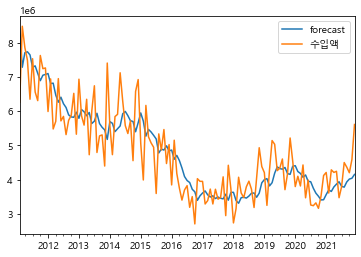

In [41]:
model_fit.plot_predict(dynamic=False)

plt.show()

In [42]:
dada=pd.date_range('2022-1-1', '2022-12-31', freq='M')

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

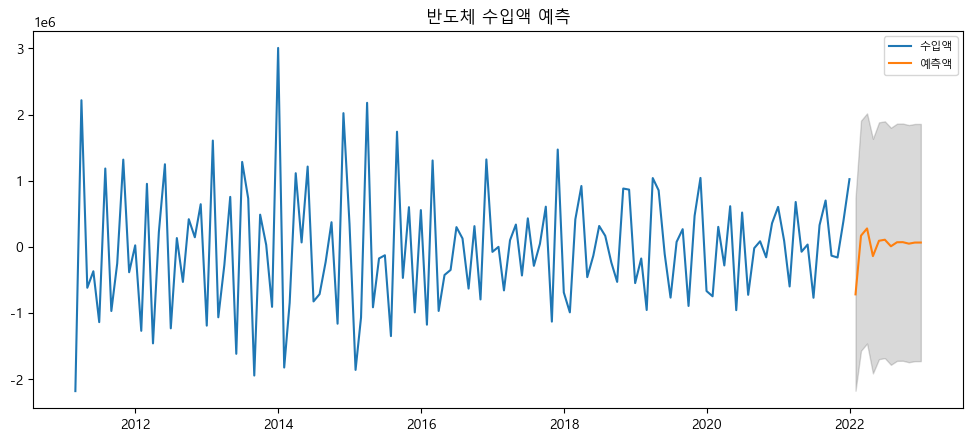

In [43]:
import datetime

model = ARIMA(y1diff, order=(2,1,1))
fitted = model.fit(disp=-1)

# Forecast
fc, se, conf = fitted.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=dada)
lower_series = pd.Series(conf[:, 0], index=dada)
upper_series = pd.Series(conf[:, 1], index=dada)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y1diff, label='수입액')
# plt.plot(dada, label='actual')
plt.plot(fc_series, label='예측액')
plt.title('반도체 수입액 예측')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='upper right', fontsize=8)
plt.show()

In [ ]:
##########################################################################

In [ ]:
# 아래의 코드는 사용 X

C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\0528x\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  131
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1952.888
Method:                       css-mle   S.D. of innovations         719007.616
Date:                Wed, 30 Mar 2022   AIC                           3909.775
Time:                        09:26:55   BIC                           3915.525
Sample:                    02-28-2011   HQIC                          3912.112
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y     -0.7356      0.050    -14.756      0.000      -0.833      -0.638
                                    Roots                                    
                  Real          Imaginary           M

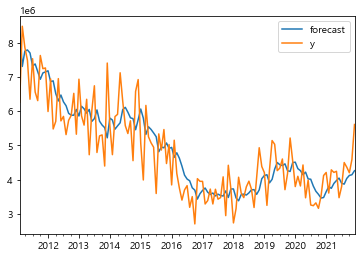

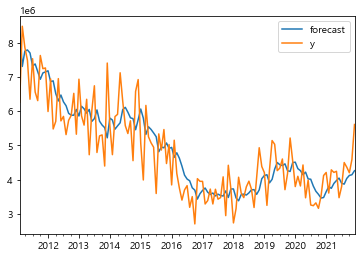

In [42]:
# from statsmodels.tsa.arima_model import ARIMA

# income_df =income_df.sort_index(ascending=True)
# income_df = income_df.dropna()
# model = ARIMA(income_df.values, order = (0,1,1), dates=(income_df.index))
# model_fit = model.fit(trend='nc',full_output=True, disp=True)
# print(model_fit.summary())
# model_fit.plot_predict()

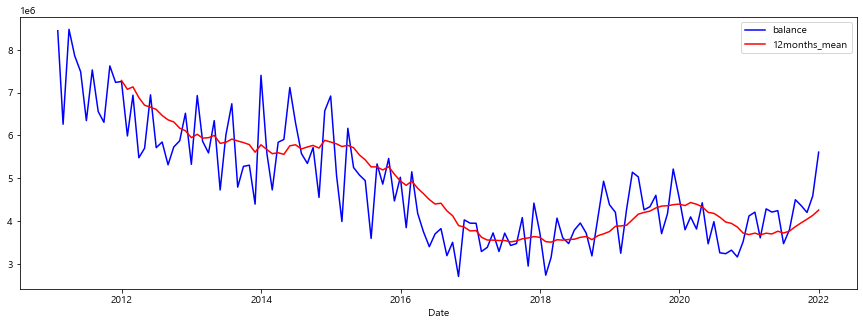

In [40]:
income_df_mean = income_df.rolling(window=12).mean()
income_df_std = income_df.rolling(window=12).std()

# rolling : 이동평균계산
# rolling(window=12).mean()의 경우, 12개를 평균내라
# 데이터가 12번째 이후인 값들부터 평균냄(12번째에 1~12번째까지의 평균을 구함)
# [참고] https://ordo.tistory.com/67

plt.figure(figsize = (15,5))
plt.xlabel('Date')
orig = plt.plot(income_df, color='blue', label='balance')
mean = plt.plot(income_df_mean, color='red', label='12months_mean')
plt.legend(loc='best')
plt.show()

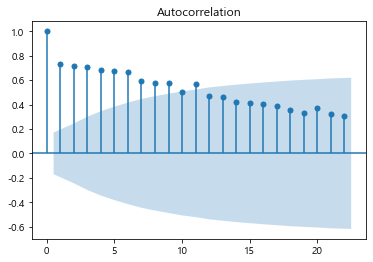

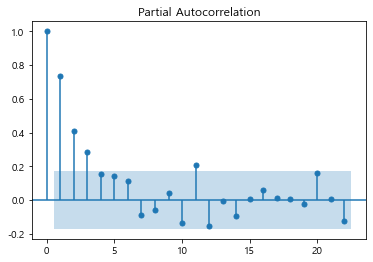

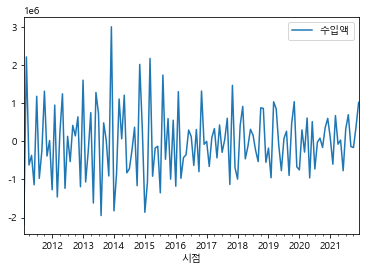

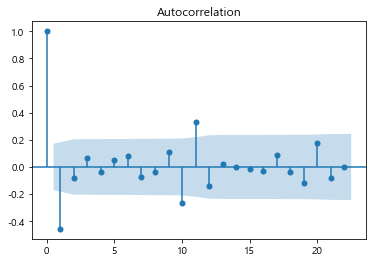

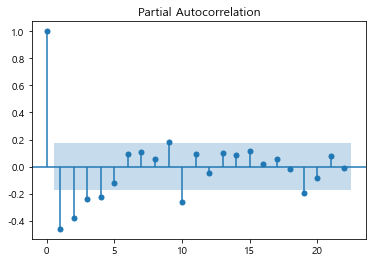

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y)
plot_pacf(y)
plt.show()

diff_1=y.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

(array([4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486, 4617676.47075486, 4617676.47075486,
       4617676.47075486

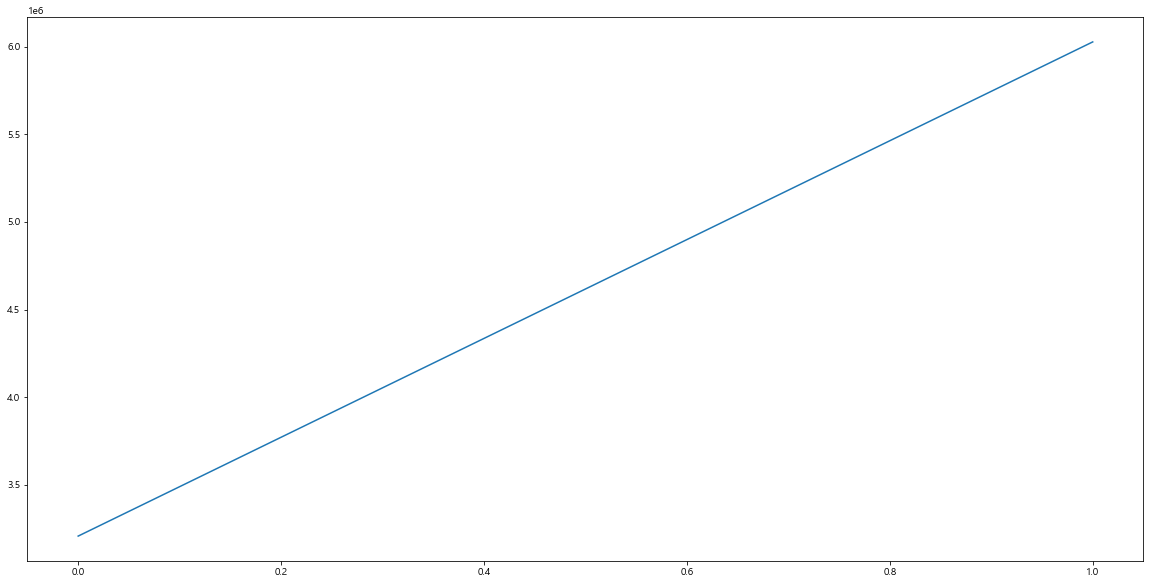

In [43]:
result = model_fit.forecast(steps=60)
plt.figure(figsize=(20,10))
print(result)

plt.plot(result[2][0])

print(result[2][0])